In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv('non_rolling_mean_win_percentage.csv')
df

,Unnamed: 0,game_id,Date,Team,Opponent,club_id,opponent_id,own_manager_name,opponent_manager_name,Referee,...,Blocks,Interceptions,Error,market_value_in_eur,total_games,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent
0,0,3050167,2018-08-12,Arsenal,Manchester City,11,281,Unai Emery,Pep Guardiola,M Oliver,...,13,12,1,3.064286e+07,318,186,58.490566,15,4,26.666667
1,1,3050167,2018-08-12,Manchester City,Arsenal,281,11,Pep Guardiola,Unai Emery,M Oliver,...,14,12,1,6.357143e+07,310,191,61.612903,15,6,40.000000
2,2,3050168,2018-08-11,Cardiff City,Bournemouth,603,989,Neil Warnock,Eddie Howe,K Friend,...,16,15,0,2.196429e+06,50,11,22.000000,1,0,0.000000
3,3,3050168,2018-08-11,Bournemouth,Cardiff City,989,603,Eddie Howe,Neil Warnock,K Friend,...,11,4,0,6.035714e+06,129,41,31.782946,1,1,100.000000
4,5,3050169,2018-08-11,Crystal Palace,Fulham,873,931,Roy Hodgson,Slavisa Jokanovic,M Dean,...,8,14,0,1.117857e+07,208,70,33.653846,3,1,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,4360,4095365,2024-03-16,Tottenham,Fulham,148,931,Ange Postecoglou,Marco Silva,R Jones,...,14,8,0,3.975000e+07,589,316,53.650255,13,10,76.923077
4362,4363,4095366,2024-03-16,Nottingham Forest,Luton Town,703,1031,Nuno Espírito Santo,Rob Edwards,D England,...,14,7,0,1.485714e+07,91,27,29.670330,2,0,0.000000
4363,4362,4095366,2024-03-16,Luton Town,Nottingham Forest,1031,703,Rob Edwards,Nuno Espírito Santo,D England,...,15,5,0,5.200000e+06,63,22,34.920635,2,0,0.000000
4364,4365,4095368,2024-03-17,West Ham,Aston Villa,379,405,David Moyes,Unai Emery,J Gillett,...,17,8,0,2.563571e+07,502,183,36.454183,18,8,44.444444


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4366 non-null   int64  
 1   game_id                     4366 non-null   int64  
 2   Date                        4366 non-null   object 
 3   Team                        4366 non-null   object 
 4   Opponent                    4366 non-null   object 
 5   club_id                     4366 non-null   int64  
 6   opponent_id                 4366 non-null   int64  
 7   own_manager_name            4366 non-null   object 
 8   opponent_manager_name       4366 non-null   object 
 9   Referee                     4366 non-null   object 
 10  TY                          4366 non-null   int64  
 11  OY                          4366 non-null   int64  
 12  TR                          4366 non-null   int64  
 13  OR                          4366 

In [4]:
df.columns

Index(['Unnamed: 0', 'game_id', 'Date', 'Team', 'Opponent', 'club_id',
       'opponent_id', 'own_manager_name', 'opponent_manager_name', 'Referee',
       'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D', 'B365OW', 'Table', 'Venue',
       'Result', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA', 'Oppo. Table',
       'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'market_value_in_eur', 'total_games', 'wins', 'win_percentage',
       'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent'],
      dtype='object')

# 인코딩

In [5]:
label_encoder = LabelEncoder()

df['le_Venue'] = label_encoder.fit_transform(df['Venue'])
df['le_Venue']
# Home은 1, Away는 0

0       1
1       0
2       0
3       1
4       0
       ..
4361    0
4362    0
4363    1
4364    1
4365    0
Name: le_Venue, Length: 4366, dtype: int64

In [6]:
df['le_Result'] = label_encoder.fit_transform(df['Result'])
df['le_Result']
# lose : 1, win : 2, draw : 0

0       1
1       2
2       1
3       2
4       2
       ..
4361    1
4362    0
4363    0
4364    0
4365    0
Name: le_Result, Length: 4366, dtype: int64

In [7]:
df['le_Referee'] = label_encoder.fit_transform(df['Referee'])
df['le_Referee']

0       21
1       21
2       15
3       15
4       20
        ..
4361    27
4362     9
4363     9
4364    12
4365    12
Name: le_Referee, Length: 4366, dtype: int64

In [8]:
new_column_order = ['club_id', 'opponent_id', 'own_manager_name', 'opponent_manager_name',
       'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error','market_value_in_eur',
        'total_games','wins',
        'win_percentage','total_games_vs_opponent',
        'wins_vs_opponent',
        'win_percentage_vs_opponent',
        'le_Venue','le_Result','le_Referee']

In [9]:
df = df[new_column_order]
df

,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,OR,B365TW,B365D,...,market_value_in_eur,total_games,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee
0,11,281,Unai Emery,Pep Guardiola,2,2,0,0,25.000000,26.315789,...,3.064286e+07,318,186,58.490566,15,4,26.666667,1,1,21
1,281,11,Pep Guardiola,Unai Emery,2,2,0,0,51.282051,26.315789,...,6.357143e+07,310,191,61.612903,15,6,40.000000,0,2,21
2,603,989,Neil Warnock,Eddie Howe,1,1,0,0,22.222222,27.777778,...,2.196429e+06,50,11,22.000000,1,0,0.000000,0,1,15
3,989,603,Eddie Howe,Neil Warnock,1,1,0,0,52.631579,27.777778,...,6.035714e+06,129,41,31.782946,1,1,100.000000,1,2,15
4,873,931,Roy Hodgson,Slavisa Jokanovic,2,1,0,0,33.333333,29.411765,...,1.117857e+07,208,70,33.653846,3,1,33.333333,0,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,148,931,Ange Postecoglou,Marco Silva,3,2,0,0,51.282051,26.315789,...,3.975000e+07,589,316,53.650255,13,10,76.923077,0,1,27
4362,703,1031,Nuno Espírito Santo,Rob Edwards,2,1,0,0,40.816327,28.571429,...,1.485714e+07,91,27,29.670330,2,0,0.000000,0,0,9
4363,1031,703,Rob Edwards,Nuno Espírito Santo,1,2,0,0,35.714286,28.571429,...,5.200000e+06,63,22,34.920635,2,0,0.000000,1,0,9
4364,379,405,David Moyes,Unai Emery,3,3,0,0,38.022814,26.666667,...,2.563571e+07,502,183,36.454183,18,8,44.444444,1,0,12


In [10]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
df['le_own_manager_name'] = label_encoder.fit_transform(df['own_manager_name'])

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_56456/1181552020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['le_own_manager_name'] = label_encoder.fit_transform(df['own_manager_name'])


In [11]:
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
label_mapping

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [12]:
# 라벨 인코더 객체 생성
label_encoder2 = LabelEncoder()

# 라벨 인코딩 적용
df['le_opponent_manager_name'] = label_encoder2.fit_transform(df['opponent_manager_name'])

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_56456/2811947186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['le_opponent_manager_name'] = label_encoder2.fit_transform(df['opponent_manager_name'])


In [13]:
label_mapping2 = dict(zip(label_encoder2.classes_, range(len(label_encoder2.classes_))))
label_mapping2

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [14]:
df = df.sort_values(['club_id'])
df

,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,OR,B365TW,B365D,...,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name
0,11,281,Unai Emery,Pep Guardiola,2,2,0,0,25.000000,26.315789,...,186,58.490566,15,4,26.666667,1,1,21,82,60
1283,11,281,Freddie Ljungberg,Pep Guardiola,1,4,0,0,16.666667,19.047619,...,232,57.711443,18,4,22.222222,1,1,25,24,60
3731,11,1148,Mikel Arteta,Thomas Frank,0,2,0,0,69.444444,21.052632,...,318,57.504521,4,2,50.000000,1,0,24,49,80
775,11,762,Unai Emery,Steve Bruce,3,1,0,0,58.139535,26.666667,...,220,58.981233,13,12,92.307692,0,2,19,82,76
2501,11,405,Mikel Arteta,Dean Smith,2,5,0,0,54.644809,26.666667,...,278,56.619145,14,9,64.285714,1,2,5,49,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,1237,631,Graham Potter,Thomas Tuchel,1,2,0,0,21.052632,26.666667,...,56,27.586207,9,0,0.000000,1,0,15,27,81
1485,1237,1132,Graham Potter,Sean Dyche,0,2,0,0,46.511628,30.303030,...,39,29.545455,6,1,16.666667,1,0,21,27,73
3694,1237,762,Roberto De Zerbi,Eddie Howe,4,2,0,0,28.571429,26.315789,...,79,31.600000,13,5,38.461538,0,1,27,67,21
102,1237,148,Chris Hughton,Mauricio Pochettino,2,1,0,0,20.000000,25.000000,...,18,30.508475,3,0,0.000000,1,1,4,11,43


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4366 entries, 0 to 3289
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   club_id                     4366 non-null   int64  
 1   opponent_id                 4366 non-null   int64  
 2   own_manager_name            4366 non-null   object 
 3   opponent_manager_name       4366 non-null   object 
 4   TY                          4366 non-null   int64  
 5   OY                          4366 non-null   int64  
 6   TR                          4366 non-null   int64  
 7   OR                          4366 non-null   int64  
 8   B365TW                      4366 non-null   float64
 9   B365D                       4366 non-null   float64
 10  B365OW                      4366 non-null   float64
 11  Table                       4366 non-null   int64  
 12  Venue                       4366 non-null   object 
 13  Result                      4366 non-n

In [16]:
# 이미 라벨링을 진행해서 모델링에 필요하지 않은 컬럼들 제거하기
modeling = df.drop(['own_manager_name','opponent_manager_name','Venue','Result'],axis=1)
modeling

,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,...,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name
0,11,281,2,2,0,0,25.000000,26.315789,51.282051,15,...,186,58.490566,15,4,26.666667,1,1,21,82,60
1283,11,281,1,4,0,0,16.666667,19.047619,69.444444,9,...,232,57.711443,18,4,22.222222,1,1,25,24,60
3731,11,1148,0,2,0,0,69.444444,21.052632,14.285714,1,...,318,57.504521,4,2,50.000000,1,0,24,49,80
775,11,762,3,1,0,0,58.139535,26.666667,22.222222,7,...,220,58.981233,13,12,92.307692,0,2,19,82,76
2501,11,405,2,5,0,0,54.644809,26.666667,23.809524,10,...,278,56.619145,14,9,64.285714,1,2,5,49,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,1237,631,1,2,0,0,21.052632,26.666667,58.139535,9,...,56,27.586207,9,0,0.000000,1,0,15,27,81
1485,1237,1132,0,2,0,0,46.511628,30.303030,28.571429,16,...,39,29.545455,6,1,16.666667,1,0,21,27,73
3694,1237,762,4,2,0,0,28.571429,26.315789,50.000000,6,...,79,31.600000,13,5,38.461538,0,1,27,67,21
102,1237,148,2,1,0,0,20.000000,25.000000,57.142857,13,...,18,30.508475,3,0,0.000000,1,1,4,11,43


In [17]:
modeling.columns

Index(['club_id', 'opponent_id', 'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'market_value_in_eur', 'total_games', 'wins', 'win_percentage',
       'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent', 'le_Venue', 'le_Result', 'le_Referee',
       'le_own_manager_name', 'le_opponent_manager_name'],
      dtype='object')

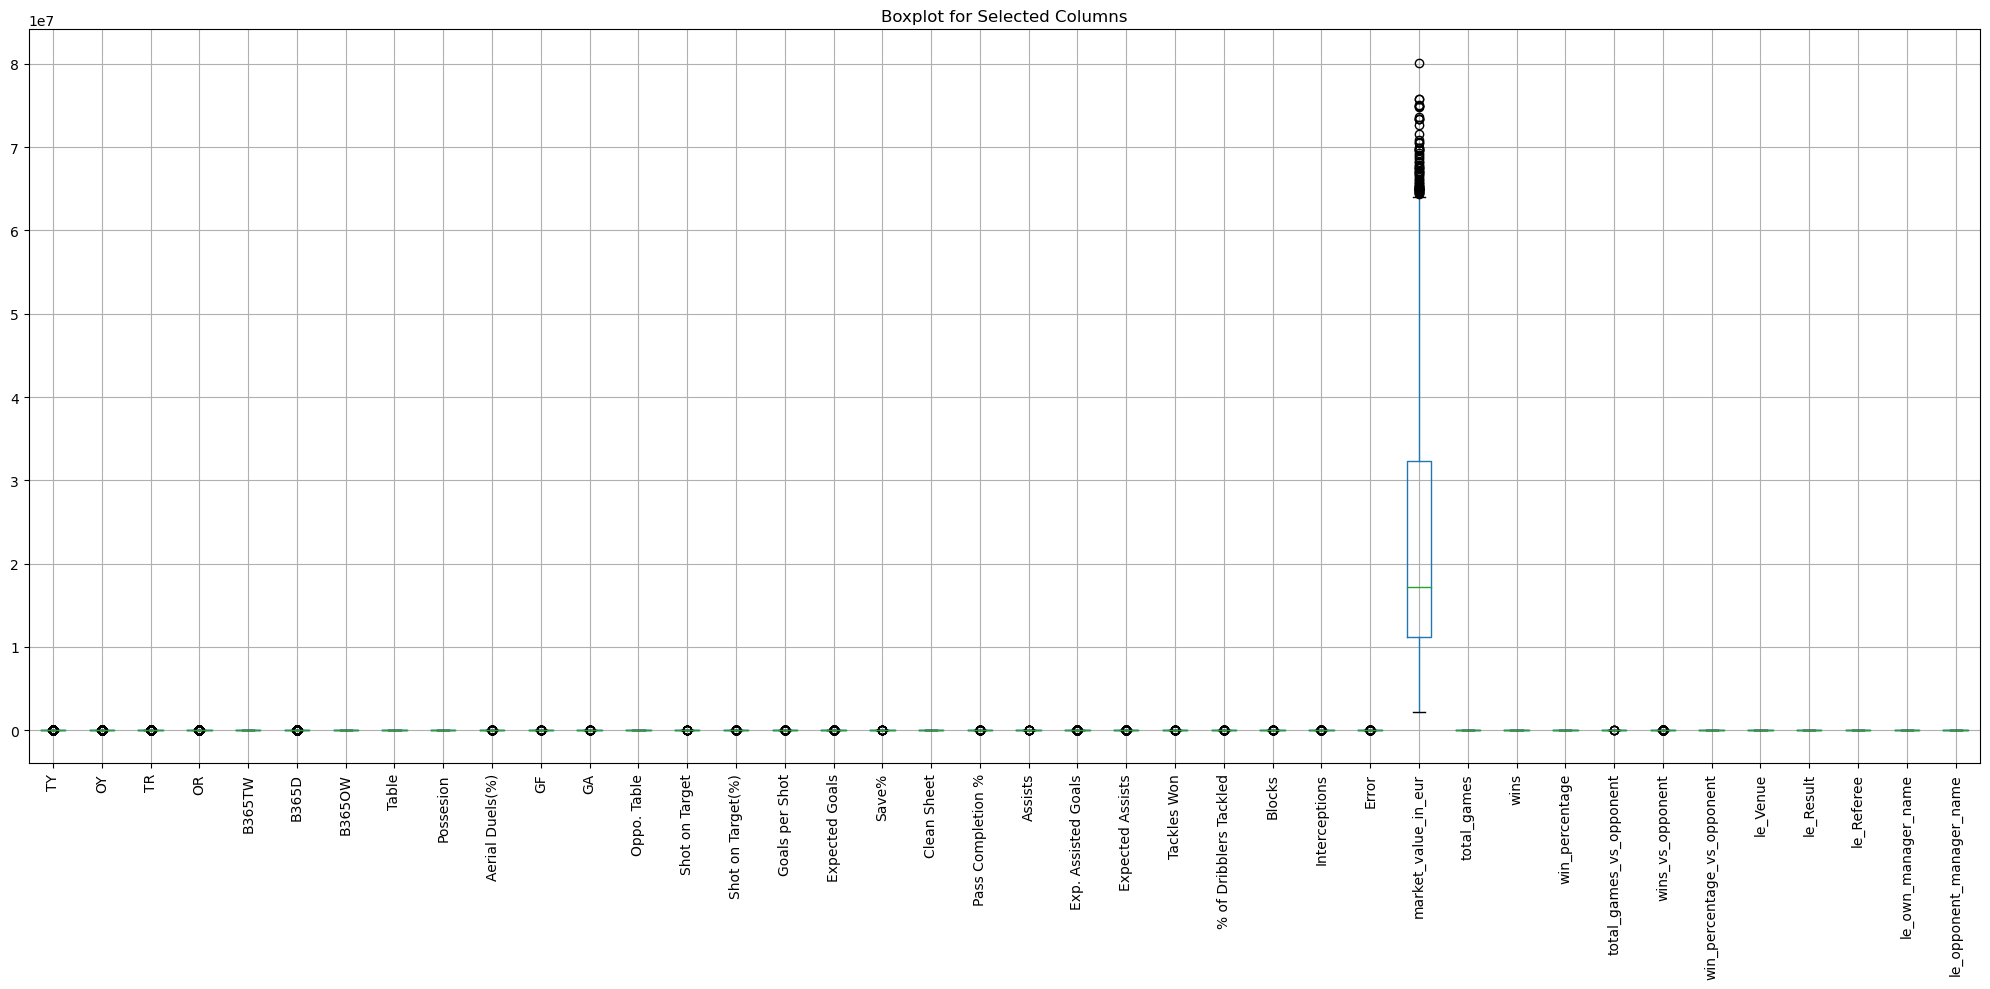

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = modeling


columns_to_check = ['TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'market_value_in_eur', 'total_games', 'wins', 'win_percentage',
       'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent', 'le_Venue', 'le_Result', 'le_Referee',
       'le_own_manager_name', 'le_opponent_manager_name']

plt.figure(figsize=(20, 10))  # 그림의 크기 조절
data[columns_to_check].boxplot(rot=90)  # 이상치 확인을 원하는 컬럼에 대한 상자그림 그리기
plt.title('Boxplot for Selected Columns')  # 그래프 제목 설정
plt.tight_layout()  # 레이아웃 조정하여 레이블이 잘 보이게 함
plt.show()

In [19]:
# 이상치를 제거할 데이터프레임 생성
data_no_outliers = data.copy()

# 각 열에 대해 Z-score를 계산하여 이상치 제거
for column in columns_to_check:
    # Z-score 계산
    z_scores = (data_no_outliers[column] - data_no_outliers[column].mean()) / data_no_outliers[column].std()
    # Z-score가 3을 넘는 행 제거 (임의의 임계값)
    data_no_outliers = data_no_outliers[(np.abs(z_scores) <= 3)]

# 이상치가 제거된 데이터프레임 출력
data_no_outliers

,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,...,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name
0,11,281,2,2,0,0,25.000000,26.315789,51.282051,15,...,186,58.490566,15,4,26.666667,1,1,21,82,60
1283,11,281,1,4,0,0,16.666667,19.047619,69.444444,9,...,232,57.711443,18,4,22.222222,1,1,25,24,60
3731,11,1148,0,2,0,0,69.444444,21.052632,14.285714,1,...,318,57.504521,4,2,50.000000,1,0,24,49,80
775,11,762,3,1,0,0,58.139535,26.666667,22.222222,7,...,220,58.981233,13,12,92.307692,0,2,19,82,76
2501,11,405,2,5,0,0,54.644809,26.666667,23.809524,10,...,278,56.619145,14,9,64.285714,1,2,5,49,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,1237,1148,2,3,0,0,38.167939,31.250000,35.714286,6,...,54,28.877005,2,2,100.000000,0,2,10,27,80
2751,1237,631,1,2,0,0,21.052632,26.666667,58.139535,9,...,56,27.586207,9,0,0.000000,1,0,15,27,81
1485,1237,1132,0,2,0,0,46.511628,30.303030,28.571429,16,...,39,29.545455,6,1,16.666667,1,0,21,27,73
3694,1237,762,4,2,0,0,28.571429,26.315789,50.000000,6,...,79,31.600000,13,5,38.461538,0,1,27,67,21


# 표준화

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data = data_no_outliers

# Date 컬럼 제거 (표준화에 영향을 미치지 않는 컬럼)
data = data.drop(columns=['club_id','opponent_id'])

# 표준화를 위해 StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터프레임에서 숫자형 컬럼들만 선택하여 표준화 수행
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_columns = numeric_columns.drop('le_Result')  # le_Result 제외
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# 결과 출력
print(data)

            TY        OY   TR   OR    B365TW     B365D    B365OW     Table  \
0     0.235464  0.250890  0.0  0.0 -0.675502  0.176430  0.504319  0.735485   
1283 -0.570045  1.866283  0.0  0.0 -1.089551 -1.261252  1.388352 -0.334506   
3731 -1.375554  0.250890  0.0  0.0  1.532758 -0.864650 -1.296434 -1.761160   
775   1.040973 -0.556806  0.0  0.0  0.971064  0.245836 -0.910134 -0.691169   
2501  0.235464  2.673979  0.0  0.0  0.797425  0.245836 -0.832874 -0.156174   
...        ...       ...  ...  ...       ...       ...       ...       ...   
2463  0.235464  1.058586  0.0  0.0 -0.021242  1.152444 -0.253424 -0.869501   
2751 -0.570045  0.250890  0.0  0.0 -0.871631  0.245836  0.838099 -0.334506   
1485 -1.375554  0.250890  0.0  0.0  0.393321  0.965128 -0.601094  0.913817   
3694  1.846481  0.250890  0.0  0.0 -0.498053  0.176430  0.441916 -0.869501   
102   0.235464 -0.556806  0.0  0.0 -0.923932 -0.083840  0.789587  0.378821   

      Possesion  Aerial Duels(%)  ...      wins  win_percentage

In [21]:
data['Exp. Assisted Goals_log_scaled'] = np.log1p(data['Exp. Assisted Goals'])
data['Expected Assists_log_scaled'] = np.log1p(data['Expected Assists'])
data['market_value_in_eur_log_scaled'] = np.log1p(data['market_value_in_eur'])

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
modeling

,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,...,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name
0,11,281,2,2,0,0,25.000000,26.315789,51.282051,15,...,186,58.490566,15,4,26.666667,1,1,21,82,60
1283,11,281,1,4,0,0,16.666667,19.047619,69.444444,9,...,232,57.711443,18,4,22.222222,1,1,25,24,60
3731,11,1148,0,2,0,0,69.444444,21.052632,14.285714,1,...,318,57.504521,4,2,50.000000,1,0,24,49,80
775,11,762,3,1,0,0,58.139535,26.666667,22.222222,7,...,220,58.981233,13,12,92.307692,0,2,19,82,76
2501,11,405,2,5,0,0,54.644809,26.666667,23.809524,10,...,278,56.619145,14,9,64.285714,1,2,5,49,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,1237,631,1,2,0,0,21.052632,26.666667,58.139535,9,...,56,27.586207,9,0,0.000000,1,0,15,27,81
1485,1237,1132,0,2,0,0,46.511628,30.303030,28.571429,16,...,39,29.545455,6,1,16.666667,1,0,21,27,73
3694,1237,762,4,2,0,0,28.571429,26.315789,50.000000,6,...,79,31.600000,13,5,38.461538,0,1,27,67,21
102,1237,148,2,1,0,0,20.000000,25.000000,57.142857,13,...,18,30.508475,3,0,0.000000,1,1,4,11,43


In [23]:
data

,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,Possesion,Aerial Duels(%),...,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name,Exp. Assisted Goals_log_scaled,Expected Assists_log_scaled,market_value_in_eur_log_scaled
0,0.235464,0.250890,0.0,0.0,-0.675502,0.176430,0.504319,0.735485,-0.610528,1.363488,...,0.040408,-0.410296,1.010863,1,0.527027,1.588993,0.663843,-1.466857,-0.670013,0.508173
1283,-0.570045,1.866283,0.0,0.0,-1.089551,-1.261252,1.388352,-0.334506,-0.529809,-1.234726,...,0.040408,-0.583117,1.010863,1,0.908052,-0.835336,0.663843,NaN,NaN,0.326300
3731,-1.375554,0.250890,0.0,0.0,1.532758,-0.864650,-1.296434,-1.761160,1.568885,-2.090843,...,-0.566076,0.497012,1.010863,0,0.812796,0.209634,1.504240,0.544442,1.039241,0.938064
775,1.040973,-0.556806,0.0,0.0,0.971064,0.245836,-0.910134,-0.691169,1.003852,-0.985855,...,2.466344,2.142132,-0.989253,2,0.336514,1.588993,1.336161,0.300399,-0.670013,0.272390
2501,0.235464,2.673979,0.0,0.0,0.797425,0.245836,-0.832874,-0.156174,0.277381,-0.756894,...,1.556618,1.052507,1.010863,2,-0.997077,0.209634,-1.058971,0.647245,0.642339,0.366776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,0.235464,1.058586,0.0,0.0,-0.021242,1.152444,-0.253424,-0.869501,0.761695,-0.756894,...,-0.566076,2.441245,-0.989253,2,-0.520794,-0.709939,1.504240,NaN,-3.023541,-0.920884
2751,-0.570045,0.250890,0.0,0.0,-0.871631,0.245836,0.838099,-0.334506,-0.449090,-1.503507,...,-1.172560,-1.447221,1.010863,0,-0.044512,-0.709939,1.546260,-0.874012,0.512456,-1.225278
1485,-1.375554,0.250890,0.0,0.0,0.393321,0.965128,-0.601094,0.913817,1.003852,0.208726,...,-0.869318,-0.799143,1.010863,0,0.527027,-0.709939,1.210101,-0.023117,0.642339,-1.706282
3694,1.846481,0.250890,0.0,0.0,-0.498053,0.176430,0.441916,-0.869501,1.246009,-1.802153,...,0.343650,0.048343,-0.989253,1,1.098565,0.962011,-0.974931,-1.466857,-3.023541,-0.751360


In [24]:
date_club_id = modeling[['club_id','opponent_id']]

# 표준화된 데이터프레임에 'Date'와 'club_id' 컬럼 추가
data_with_ids = pd.concat([date_club_id, data.reset_index()], axis=1)

# 결과 확인
print(data_with_ids)

      club_id  opponent_id   index        TY        OY   TR   OR    B365TW  \
0          11          281     0.0  0.235464  0.250890  0.0  0.0 -0.675502   
1283       11          281  3908.0  1.040973  0.250890  0.0  0.0 -0.610126   
3731       11         1148     NaN       NaN       NaN  NaN  NaN       NaN   
775        11          762  3309.0  1.040973  1.058586  0.0  0.0 -0.675502   
2501       11          405   515.0 -0.570045  0.250890  0.0  0.0 -1.365584   
...       ...          ...     ...       ...       ...  ...  ...       ...   
2751     1237          631  1334.0 -1.375554  1.058586  0.0  0.0  0.242606   
1485     1237         1132  3051.0 -1.375554  0.250890  0.0  0.0 -0.364966   
3694     1237          762     NaN       NaN       NaN  NaN  NaN       NaN   
102      1237          148  2768.0 -0.570045  1.058586  0.0  0.0 -0.770169   
3289     1237          281  3865.0  1.846481  1.866283  0.0  0.0  0.069785   

         B365D    B365OW  ...  wins_vs_opponent  win_percentage

In [25]:
non_app_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table', 'Oppo. Table', 
'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result']

In [26]:
app_features = ['club_id', 'TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals_log_scaled', 'Expected Assists_log_scaled', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error','market_value_in_eur_log_scaled',
               'total_games', 'wins','win_percentage',
       'total_games_vs_opponent',
       'wins_vs_opponent',
       'win_percentage_vs_opponent']

In [27]:
selected_col = ['TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals_log_scaled', 'Expected Assists_log_scaled', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error','market_value_in_eur_log_scaled',
               'total_games', 'wins','win_percentage',
       'total_games_vs_opponent',
       'wins_vs_opponent',
       'win_percentage_vs_opponent']

In [28]:
data_with_ids[app_features]

,club_id,TY,OY,TR,OR,Possesion,Aerial Duels(%),GF,GA,Shot on Target,...,Blocks,Interceptions,Error,market_value_in_eur_log_scaled,total_games,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent
0,11,0.235464,0.250890,0.0,0.0,-0.610528,1.363488,-1.142179,0.496102,-0.440245,...,0.404329,0.499079,1.039125,0.508173,0.168194,0.644512,1.566910,0.697676,0.040408,-0.410296
1283,11,1.040973,0.250890,0.0,0.0,-0.206933,-1.652830,-0.233020,-1.158565,1.372977,...,1.149749,-0.265253,-0.637565,0.463493,0.257899,-0.287464,-0.777501,1.007259,0.040408,-0.532287
3731,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,11,1.040973,1.058586,0.0,0.0,0.519538,0.009629,-1.142179,-0.331232,0.013060,...,-0.341092,-1.029586,1.039125,-0.839775,0.968639,0.216899,-0.496161,1.626425,1.859860,0.404430
2501,11,-0.570045,0.250890,0.0,0.0,-0.449090,1.522766,-1.142179,2.978104,0.013060,...,-1.086512,-0.010476,1.039125,-1.208071,-0.963470,-0.846649,-0.613766,-0.540655,-1.172560,-1.447221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,1237,-1.375554,1.058586,0.0,0.0,1.003852,0.666649,-1.142179,1.323436,0.013060,...,-1.583459,-2.303473,1.039125,-1.216638,-0.646052,-0.660254,-0.527247,-0.385864,-0.566076,-0.475104
1485,1237,-1.375554,0.250890,0.0,0.0,0.842414,-0.607571,-0.233020,0.496102,0.919671,...,-1.334986,1.008634,-0.637565,-0.195405,-0.687455,-0.528681,0.077912,-0.850238,-0.566076,0.108166
3694,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,1237,-0.570045,1.058586,0.0,0.0,-1.336999,0.009629,2.494457,0.496102,-0.440245,...,1.895170,1.263412,1.039125,0.297308,1.486168,1.795776,1.456326,2.245591,1.556618,-0.047373


In [29]:
moving_avg = data_with_ids[app_features].groupby('club_id')[selected_col].rolling(window=5).mean().reset_index(drop=True)
moving_avg

,TY,OY,TR,OR,Possesion,Aerial Duels(%),GF,GA,Shot on Target,Shot on Target(%),...,Blocks,Interceptions,Error,market_value_in_eur_log_scaled,total_games,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
m_final = pd.concat([data_with_ids[non_app_features], moving_avg], axis=1)
cleaned_final = m_final.dropna()

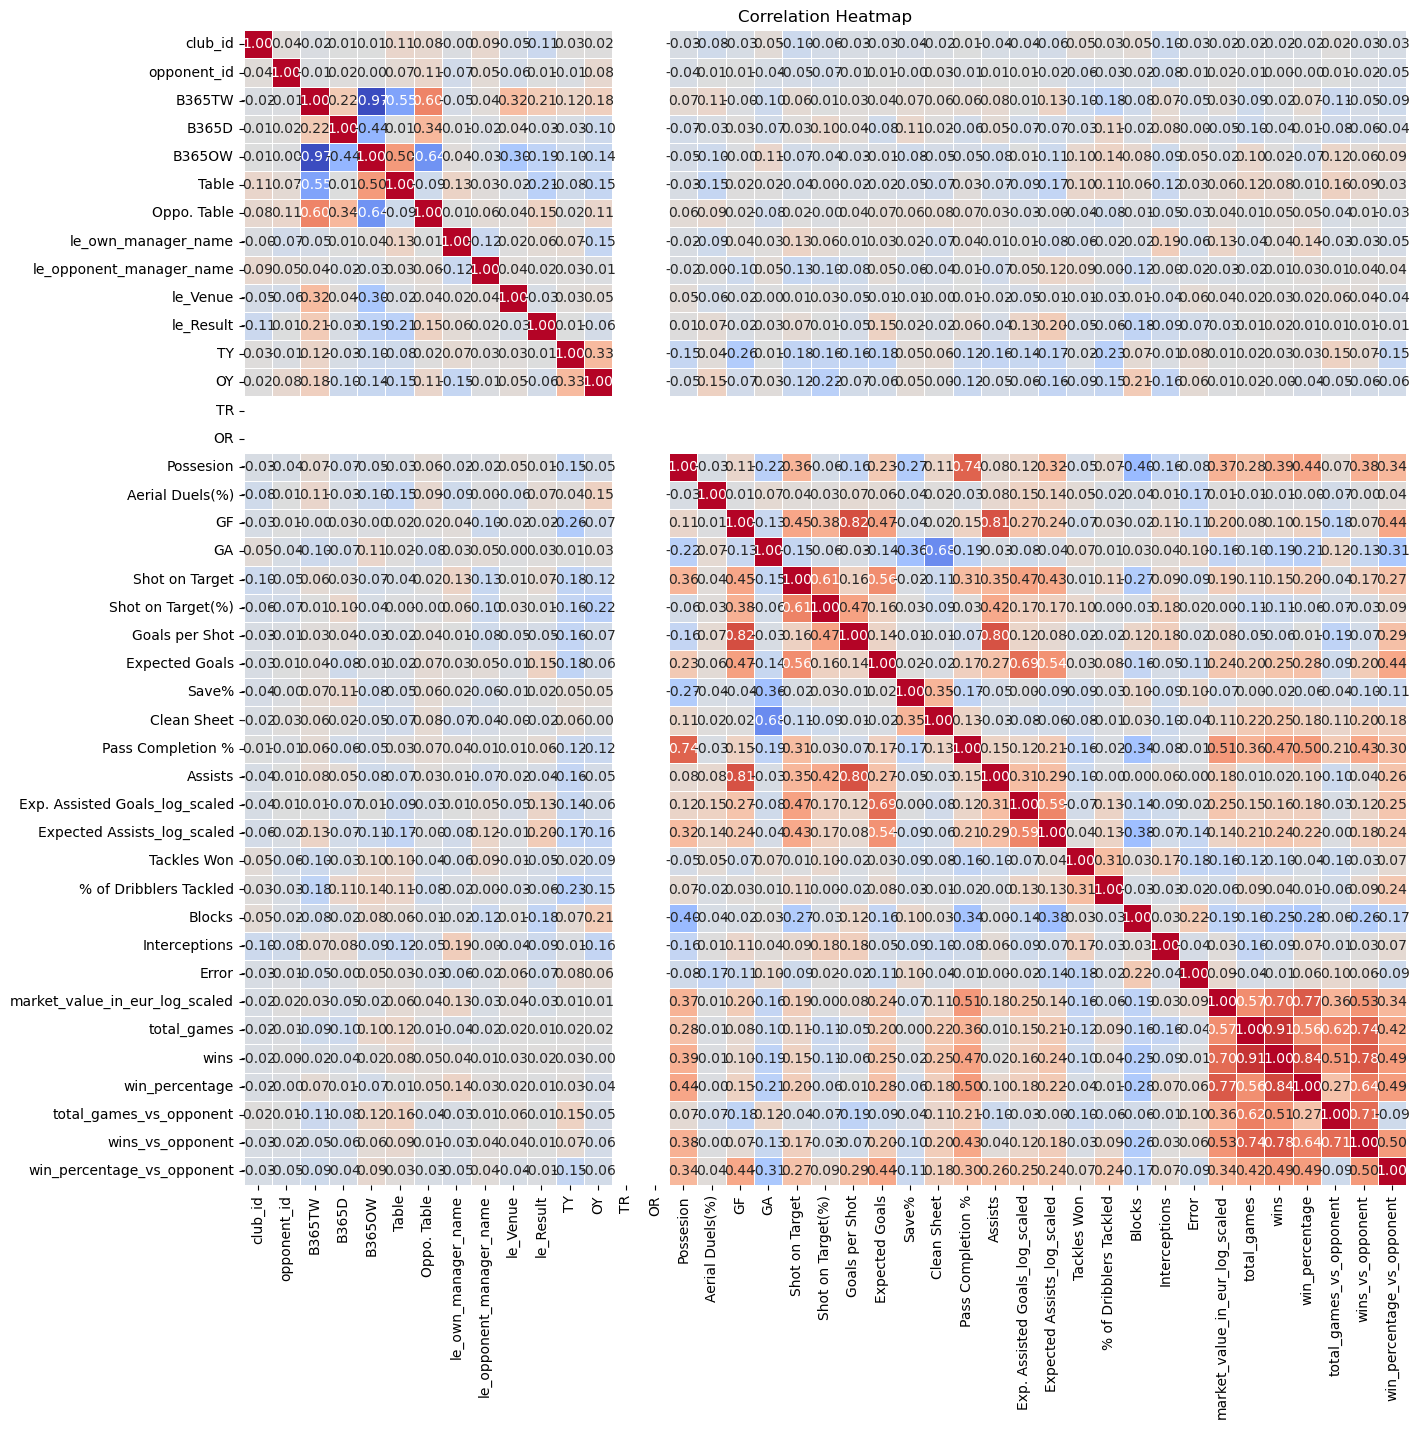

In [31]:
corr = cleaned_final.corr()

# 상관관계 그래프 그리기
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
cleaned_final.columns

Index(['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_Venue', 'le_Result', 'TY', 'OY', 'TR', 'OR', 'Possesion',
       'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals_log_scaled',
       'Expected Assists_log_scaled', 'Tackles Won', '% of Dribblers Tackled',
       'Blocks', 'Interceptions', 'Error', 'market_value_in_eur_log_scaled',
       'total_games', 'wins', 'win_percentage', 'total_games_vs_opponent',
       'wins_vs_opponent', 'win_percentage_vs_opponent'],
      dtype='object')

In [33]:
modeling_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_Venue', 'TY', 'OY', 'TR', 'OR', 'Possesion',
       'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals_log_scaled',
       'Expected Assists_log_scaled', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error','market_value_in_eur_log_scaled',
                    'total_games', 'wins',
       'win_percentage', 'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent']

In [34]:
cleaned_final[modeling_features]

,club_id,opponent_id,B365TW,B365D,B365OW,Table,Oppo. Table,le_own_manager_name,le_opponent_manager_name,le_Venue,...,Blocks,Interceptions,Error,market_value_in_eur_log_scaled,total_games,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent
379,11,931,0.697396,-0.083840,-0.601094,-1.582828,-1.120451,-0.333750,0.201625,-0.989253,...,-0.490176,-0.520031,-0.302227,0.181481,0.458010,0.482238,0.365105,-0.447780,-0.202186,0.446513
2198,11,984,-0.388853,0.788831,0.061973,1.448812,0.102107,-1.253323,0.369704,1.010863,...,-0.688955,-0.367164,-0.637565,-1.061067,-0.080220,-0.096683,-0.140792,-0.323947,0.404298,1.122974
2138,11,931,0.242606,0.788831,-0.421651,-0.334506,1.150014,1.003810,-0.260594,1.010863,...,-0.838039,-0.672897,0.368449,0.669921,1.281917,1.609381,1.440058,0.357135,1.495970,1.215452
678,11,873,-0.192446,1.057345,-0.082997,1.627144,0.102107,0.251432,1.588280,1.010863,...,-0.440481,0.244302,-0.637565,0.292657,0.387626,0.872572,1.293899,0.016594,1.010782,1.082134
676,11,1010,-0.734652,0.465620,0.639243,1.627144,-0.596497,0.251432,1.504240,-0.989253,...,-0.390787,0.499079,-0.302227,0.939426,0.793369,1.379128,1.833220,-0.262031,0.768189,1.663552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,1237,405,-1.333109,-1.261252,1.667911,1.448812,-0.771149,-0.793537,0.957982,-0.989253,...,0.255245,-0.723853,-0.302227,-1.389094,0.119891,-0.221677,-0.600672,0.264260,0.101056,-0.212823
2142,1237,631,-0.971252,-0.083840,1.012782,-0.512838,-0.247195,-0.166555,-0.722812,-0.989253,...,0.304939,-0.061431,0.033111,-0.448668,0.740926,0.433995,0.092618,0.542885,0.586244,0.314014
303,1237,1132,0.448344,0.788831,-0.639724,0.913817,1.499316,1.212804,1.630300,-0.989253,...,-0.291397,0.397168,0.368449,-0.387130,-0.313453,0.006383,0.288016,0.202344,0.222353,0.126682
2624,1237,1132,1.735723,-1.261252,-1.383352,-1.404496,1.499316,-1.545915,-1.058971,1.010863,...,-0.192008,-0.010476,-0.302227,-0.174088,0.078489,0.190585,0.343033,0.264260,0.222353,-0.228972


In [35]:
X = cleaned_final[modeling_features]
y = cleaned_final['le_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
cleaned_final['le_Result']

379     2.0
2198    0.0
2138    2.0
678     1.0
676     1.0
       ... 
2481    1.0
2142    0.0
303     2.0
2624    2.0
1561    0.0
Name: le_Result, Length: 276, dtype: float64

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.48214285714285715
F1 Score: 0.42394945966374536


In [38]:
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.4642857142857143
F1 Score: 0.4034769463340892


In [39]:
estimator = RandomForestClassifier(n_estimators=100, random_state=42) # 학습시킬 모델 지정
selector = RFECV(estimator, step=1, cv = 5) # 한 step에 제거할 featrue 개수 및 cross validation fold 수 지정
selector = selector.fit(X_train, y_train) # feature selection 진행

In [40]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True])

In [41]:
selected_columns = X_train.columns[selector.support_]
selected_columns

Index(['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'Possesion', 'Aerial Duels(%)', 'GF', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Pass Completion %',
       'Exp. Assisted Goals_log_scaled', 'Expected Assists_log_scaled',
       'Tackles Won', '% of Dribblers Tackled', 'Blocks', 'Interceptions',
       'market_value_in_eur_log_scaled', 'total_games', 'win_percentage',
       'total_games_vs_opponent', 'win_percentage_vs_opponent'],
      dtype='object')

In [42]:
rfecv_selected_col = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'Possesion', 'Aerial Duels(%)', 'GF', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Pass Completion %',
       'Exp. Assisted Goals_log_scaled', 'Expected Assists_log_scaled',
       'Tackles Won', '% of Dribblers Tackled', 'Blocks', 'Interceptions',
       'market_value_in_eur_log_scaled', 'total_games', 'win_percentage',
       'total_games_vs_opponent', 'win_percentage_vs_opponent']

In [43]:
X = cleaned_final[rfecv_selected_col]
y = cleaned_final['le_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# 랜덤포레스트
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.42857142857142855
F1 Score: 0.36173889004077686


In [45]:
rf_model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model2.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5178571428571429
F1 Score: 0.42549095109742


In [46]:
rf_model3 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model3.fit(X_train, y_train)

y_pred = rf_model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.48214285714285715
F1 Score: 0.40181421405771617


In [47]:
rf_model4 = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model4.fit(X_train, y_train)

y_pred = rf_model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5
F1 Score: 0.4102464834172151


In [48]:
rf_model4 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_model4.fit(X_train, y_train)

y_pred = rf_model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5357142857142857
F1 Score: 0.43960511033681765


In [49]:
rf_model5 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model5.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5178571428571429
F1 Score: 0.42549095109742


In [50]:
rf_model6 = RandomForestClassifier(n_estimators=300, max_depth=7, random_state=42)
rf_model6.fit(X_train, y_train)

y_pred = rf_model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.48214285714285715
F1 Score: 0.40181421405771617
